In [9]:
from PIL import Image
import sys, os
sys.path.append(os.pardir) # Append parent directoy
from MNIST_data.mnist import load_mnist

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### One-hot encoding
The one value that is matched with the right value is $1$ else $0$. For instance, when we see the number $1$ on the array, that is $[0,1,0,0,0,0,0,0,0]$

LABEL: 5
(784,)


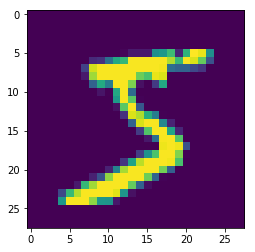

In [12]:
from matplotlib.pyplot import imshow

img = x_train[0]
label = t_train[0]
print("LABEL:",label)

print(img.shape)
img = img.reshape(28,28)
imshow(np.asarray(img))
plt.show()

#### Make a function for each method
Used the weights that were already saved before by pickle library.

In [13]:
import pickle


def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=True, one_hot_label=False)

    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
        return network
    

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = sigmoid(a3)
    
    return y

In [14]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    print("Accuracy:", str(float(accuracy_cnt) / len(x)))

Accuracy: 0.0096
Accuracy: 0.0194
Accuracy: 0.0287
Accuracy: 0.0377
Accuracy: 0.0471
Accuracy: 0.056
Accuracy: 0.0653
Accuracy: 0.0748
Accuracy: 0.0841
Accuracy: 0.0932
Accuracy: 0.1024
Accuracy: 0.1114
Accuracy: 0.1201
Accuracy: 0.1293
Accuracy: 0.1383
Accuracy: 0.1473
Accuracy: 0.1564
Accuracy: 0.1651
Accuracy: 0.1743
Accuracy: 0.1831
Accuracy: 0.1921
Accuracy: 0.2009
Accuracy: 0.2105
Accuracy: 0.2197
Accuracy: 0.2289
Accuracy: 0.2379
Accuracy: 0.2473
Accuracy: 0.2567
Accuracy: 0.2662
Accuracy: 0.2753
Accuracy: 0.285
Accuracy: 0.2939
Accuracy: 0.3034
Accuracy: 0.3131
Accuracy: 0.3223
Accuracy: 0.3314
Accuracy: 0.3408
Accuracy: 0.3496
Accuracy: 0.3577
Accuracy: 0.3667
Accuracy: 0.3759
Accuracy: 0.3851
Accuracy: 0.3941
Accuracy: 0.403
Accuracy: 0.412
Accuracy: 0.4214
Accuracy: 0.4311
Accuracy: 0.4405
Accuracy: 0.4493
Accuracy: 0.4587
Accuracy: 0.468
Accuracy: 0.4777
Accuracy: 0.4875
Accuracy: 0.4974
Accuracy: 0.5072
Accuracy: 0.5172
Accuracy: 0.5264
Accuracy: 0.5361
Accuracy: 0.5454
Ac

### Normalization
The range of vaule is 0 to 255. Normalization will make this range 0.0~1.0. It is one of the way for pre-processing.

In [8]:
# np.argmax Example
print(list(range(0,10)))
print(list(range(0,10,3)))

x = np.array([[0,0.8,0.1],\
             [0.3, 0.1, 0.6],\
             [0.2, 0.5, 0.3],\
             [0.8, 0.1, 0.1]])

y1 = np.argmax(x, axis=1)
print(y1)

y2 = np.argmax(x, axis=0)
print(2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]
[1 2 1 0]
2
